In [1]:
import matplotlib.pyplot as plt
import pandas as pd

**Question 1** Definir dans une variable schema_movies une liste de paires
(clé, valeur) dont les clés sont des noms de colonnes et les valeurs des
chaînes de caractères représentant des types, pour le fichier movies.csv.

In [2]:
shema_movies = {"ID" : "i", "TITLE":"U", "YEAR": "i", "RUNTIME":"i", "RANK":"f"}

In [3]:
df = pd.read_csv("/content/drive/MyDrive/movies.csv", dtype=shema_movies, delimiter=";")

In [4]:
print(df)

       ID                                            TITLE  YEAR  RUNTIME  \
0    2065                 The Treasure of the Sierra Madre  1948      126   
1    2115                              Million Dollar Baby  2004      132   
2    2089                           No Country for Old Men  2007      122   
3    2009  Star Wars : Episode V - The Empire Strikes Back  1980      190   
4    2070                              Singin' in the Rain  1952      103   
..    ...                                              ...   ...      ...   
206  2143                              The Grapes of Wrath  1940      190   
207  2010                                  The Dark Knight  2008      152   
208  2197                              Anatomy of a Murder  1959      160   
209  2164                                  Rosemary's Baby  1968      136   
210  2091                           For a Few Dollars More  1965      132   

      RANK  
0     66.0  
1    116.0  
2     90.0  
3     10.0  
4     71.0

In [5]:
df.head()

,ID,TITLE,YEAR,RUNTIME,RANK
0,2065,The Treasure of the Sierra Madre,1948,126,66.0
1,2115,Million Dollar Baby,2004,132,116.0
2,2089,No Country for Old Men,2007,122,90.0
3,2009,Star Wars : Episode V - The Empire Strikes Back,1980,190,10.0
4,2070,Singin' in the Rain,1952,103,71.0


**Question 3** [Statistiques] Calculer les valeurs suivantes, en utilisant les
opérateurs de DataFrame et en sélectionnant judicieusement ces dernières.  

• Nombre de lignes  
• Année la plus grande  
• Moyenne des durées

In [14]:
print(f"le nombre de lignes est {df.shape[0]}")

le nombre de lignes est 211


In [15]:
print(f"l'année la plus grande est {df['YEAR'].max()}")

l'année la plus grande est 2010


In [16]:
mean_runtime = df["RUNTIME"].mean()

In [18]:
print(f"la moyenne des durées est {mean_runtime:.2f} minutes")

la moyenne des durées est 140.42 minutes


**Question 4** [Filtrage] Pour chacun des critères suivants, calculer l’ensemble
des lignes qui vérifient ces critères (et afficher ces lignes pour vérifier).  

• Les films dont le rang est inférieur à 20  
• Les films dont la durée est supérieure à la moyenne des durées  
• Les films dont le titre contient ’Wars’


In [19]:
q4a = df["TITLE"][df["RANK"]<20]
q4a = pd.DataFrame(q4a).reset_index(drop=True)
q4a

,TITLE
0,Star Wars : Episode V - The Empire Strikes Back
1,Schindler's List
2,"The Good,the Bad and the Ugly"
3,The Godfather
4,Toy Story 3
5,Star Wars : Episode IV - A New Hope
6,The Godfather Part II
7,One Flew Over the Cuckoo's Nest
8,Casablanca
9,12 Angry Men


In [20]:
q4b = df["TITLE"][df["RUNTIME"] > mean_runtime]
q4b = pd.DataFrame(q4b).reset_index(drop=True)
q4b

,TITLE
0,Star Wars : Episode V - The Empire Strikes Back
1,Schindler's List
2,Gone with the Wind
3,"The Good,the Bad and the Ugly"
4,Forrest Gump
...,...
82,The Lord of the Rings : The Two Towers
83,Roman Holiday
84,The Grapes of Wrath
85,The Dark Knight


In [21]:
q4c = df["TITLE"][df["TITLE"].str.contains("Wars")]
q4c = pd.DataFrame(q4c).reset_index(drop=True)
q4c

,TITLE
0,Star Wars : Episode V - The Empire Strikes Back
1,Star Wars : Episode VI - Return of the Jedi
2,Star Wars : Episode IV - A New Hope


**Question 5** [Tris et sous-parties] Afficher les films triés par ordre croissants
de rang et prendre les dix premières lignes. Afficher les films triés par ordre
décroissant d’années et prendre les lignes 10 à 20.


In [23]:
q5a = df.sort_values(by="RANK")["TITLE"]
q5a = pd.DataFrame(q5a).reset_index(drop=True)
q5a.head(10)

,TITLE
0,The Shawshank Redemption
1,The Godfather
2,The Godfather Part II
3,Inception
4,"The Good,the Bad and the Ugly"
5,Pulp Fiction
6,Schindler's List
7,12 Angry Men
8,One Flew Over the Cuckoo's Nest
9,Star Wars : Episode V - The Empire Strikes Back


In [29]:
q5b = df.sort_values(by="RANK", ascending=False)["TITLE"]
q5b = pd.DataFrame(q5b).reset_index(drop=True)

In [62]:
q5b[10:21] #sup pas inclus comme on peut voir

,TITLE
10,"Monsters,Inc."
11,Roman Holiday
12,Barry Lyndon
13,Anatomy of a Murder
14,The Conversation
15,Who's Afraid of Virginia Woolf?
16,Manhattan
17,Planet of the Apes
18,Toy Story 2
19,My Neighbor Totoro


**Question 6** [Aggrégats] Compter le nombre de films par années. Compter
la durée moyenne des films par année.

In [59]:
q6a = df.groupby("YEAR", as_index=False)["TITLE"].count()
q6a.head()

,YEAR,TITLE
0,1921,1
1,1925,1
2,1926,1
3,1927,1
4,1931,1


In [58]:
q6b = df.groupby("YEAR", as_index=False)["RUNTIME"].mean()
q6b.head()

,YEAR,RUNTIME
0,1921,54.0
1,1925,190.0
2,1926,190.0
3,1927,106.0
4,1931,99.0


**Question 7** Compter le nombre de films par années et afficher les résultats.
Le nombre d’années différentes étant trop grand pour avoir un graphique
lisible, on va créer un résumé des données.  

• Créer une copie de la DataFrame movies  
• Sur la copie, mettre à jour la colonne ’YEAR’ en arrondissant chaque
année à la décennie la plus proche. On peut par exemple faire la division entière par 10, puis remultiplier par 10.  
• Effectuer un groupby par année et compter le nombre de films.  
• Tracer un histogramme à partir de la DataFrame obtenue

In [38]:
dfbis = df.copy()

In [39]:
dfbis["YEAR"] = (dfbis["YEAR"] //10)*10

In [40]:
dfbis["YEAR"].unique()

array([1940, 2000, 1980, 1950, 1970, 1990, 1930, 1960, 1920, 2010],
      dtype=int32)

In [41]:
q7 = dfbis.groupby("YEAR", as_index=False)["TITLE"].count()

In [42]:
q7.head()

,YEAR,TITLE
0,1920,4
1,1930,9
2,1940,16
3,1950,27
4,1960,23


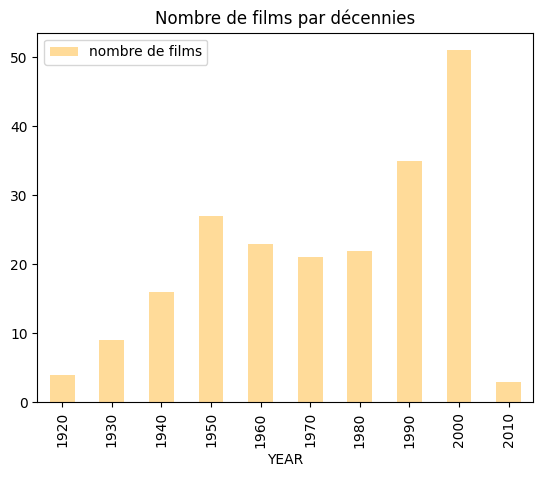

In [43]:
q7.plot(x="YEAR", y="TITLE", kind="bar", label="nombre de films", alpha=0.4, color="orange")
plt.title("Nombre de films par décennies")
plt.show()

**Question 8** Procéder comme ci-dessus pour afficher la moyenne des rangs
des films par décennie

In [57]:
q8 = dfbis.groupby("YEAR", as_index=False)["RANK"].mean()
q8.head()

,YEAR,RANK
0,1920,140.500000
1,1930,124.000000
2,1940,111.250000
3,1950,116.703705
4,1960,111.043480


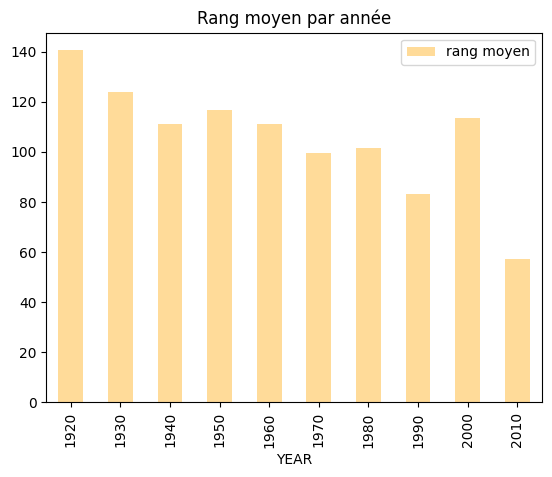

In [56]:
q8.plot(x="YEAR", y="RANK", kind="bar", alpha=0.4, color="orange", label="rang moyen")
plt.title("Rang moyen par année")
plt.legend()
plt.show()

**Question 9** Afficher un graphique en nuage de points (.scatter) de la
durée par rapport au rang du film. Peut on déduire une quelconque correlation ?

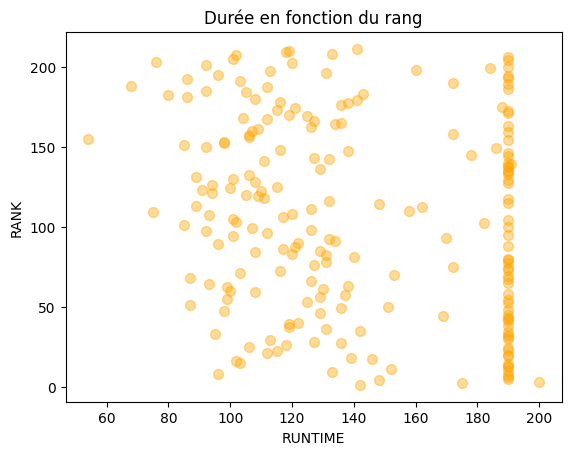

In [61]:
df.plot(x="RUNTIME", y="RANK", kind="scatter", color="orange", s =50, alpha = 0.4)
plt.title("Durée en fonction du rang")
plt.show()

**Peut on déduire une quelconque correlation ?**  

Non puisqu'on remarque qu'on retrouve aussi bien des rangs élevés ou bas pour les longs films que pour les films courts. On peut noter pas mal de films qui durent 190 minutes.